C:\Users\Asad-MET Police\AppData\Local\Temp\ipykernel_16808\1124507807.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


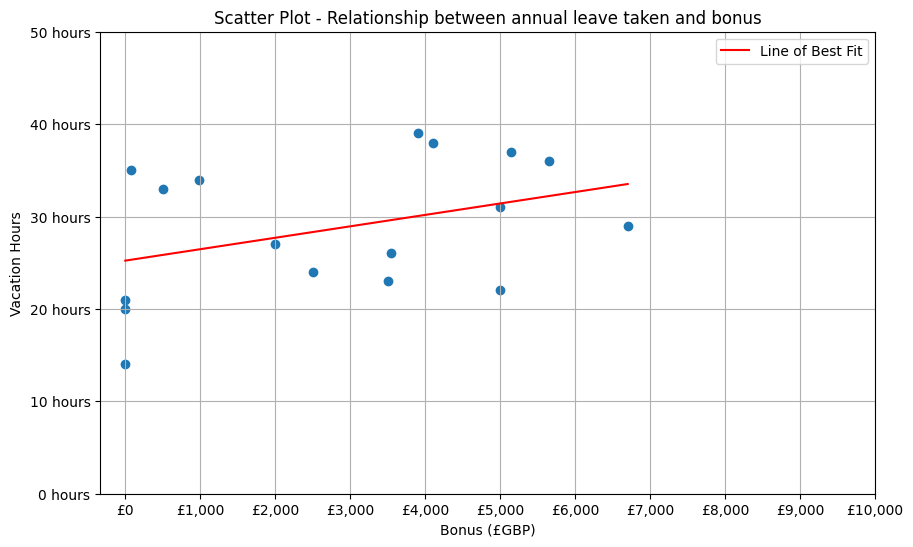

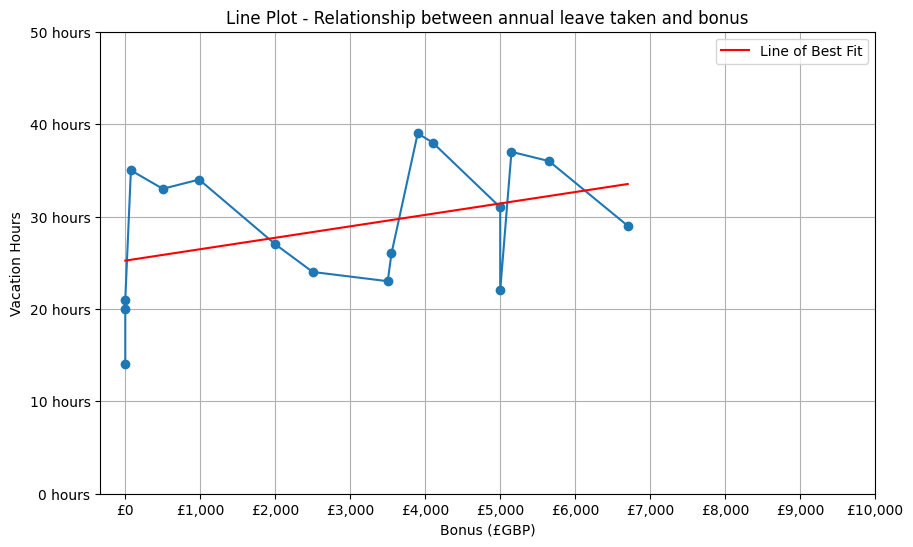

In [12]:
import pyodbc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-OE9L004\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')


cursor = conn.cursor()


# SQL Query
sql_query = '''
SELECT 
    hr.VacationHours AS VacationHours,  
    sp.Bonus AS Bonus
FROM 
    HumanResources.Employee AS hr
JOIN 
    Sales.SalesPerson AS sp
ON 
    hr.BusinessEntityID = sp.BusinessEntityID
ORDER BY 
    sp.Bonus DESC;
'''

# Define the SQL query
sql_query = '''
SELECT 
    hr.VacationHours,  
    sp.Bonus
FROM 
    HumanResources.Employee AS hr
JOIN 
    Sales.SalesPerson AS sp
ON 
    hr.BusinessEntityID = sp.BusinessEntityID
ORDER BY 
    sp.Bonus ASC;
'''


# Execute the SQL query and fetch the data into a DataFrame for line plot
df = pd.read_sql(sql_query, conn)


conn.close()


# Define custom ticks for X-axis in £GBP format
x_ticks = range(0, 10001, 1000)
x_tick_labels = [f'£{x:,.0f}' for x in x_ticks]

# Define custom ticks for Y-axis in increments of 10 up to 50
y_ticks = range(0, 51, 10)
y_tick_labels = [f'{y} hours' for y in y_ticks]

# Calculate coefficients for the line of best fit
coefficients = np.polyfit(df['Bonus'], df['VacationHours'], 1)

# Generate points for the line of best fit
x_values = np.linspace(min(df['Bonus']), max(df['Bonus']), 100)
y_values = np.polyval(coefficients, x_values)

# Plot scatter plot with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(df['Bonus'], df['VacationHours'])
plt.plot(x_values, y_values, color='red', linestyle='-', label='Line of Best Fit')
plt.title('Scatter Plot - Relationship between annual leave taken and bonus')
plt.xlabel('Bonus (£GBP)')
plt.ylabel('Vacation Hours')
plt.xticks(x_ticks, labels=x_tick_labels)
plt.yticks(y_ticks, labels=y_tick_labels)  # custom ticks for Y-axis
plt.legend()
plt.grid(True)
plt.show()

# Calculate coefficients for the line of best fit
coefficients = np.polyfit(df['Bonus'], df['VacationHours'], 1)

# Generate points for the line of best fit
x_values = np.linspace(min(df['Bonus']), max(df['Bonus']), 100)
y_values = np.polyval(coefficients, x_values)

# Plot line plot with line of best fit
plt.figure(figsize=(10, 6))
plt.plot(df['Bonus'], df['VacationHours'], marker='o', linestyle='-')
plt.plot(x_values, y_values, color='red', linestyle='-', label='Line of Best Fit')
plt.title('Line Plot - Relationship between annual leave taken and bonus')
plt.xlabel('Bonus (£GBP)')
plt.ylabel('Vacation Hours')
plt.xticks(x_ticks, labels=x_tick_labels)  # custom ticks for X-axis
plt.yticks(y_ticks, labels=y_tick_labels)  # custom ticks for Y-axis
plt.legend()
plt.grid(True)
plt.show()



